In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
df = pd.read_csv('C:\\Users\\Mansi\\Downloads\\heart.csv') #Importing Dataset

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Checking for null values

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Data Analysis

Text(0, 0.5, 'Frequency')

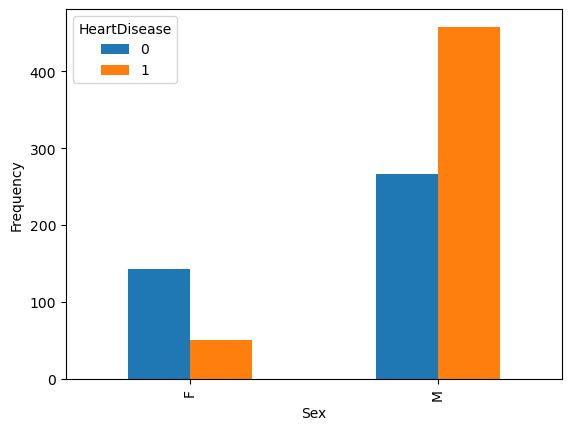

In [7]:
outcome_counts = df.groupby(['Sex', 'HeartDisease']).size().unstack(fill_value=0)
outcome_counts.plot(kind='bar')
plt.ylabel('Frequency')

The data indicates a higher prevalence of heart disease among males.

Text(0, 0.5, 'Frequency')

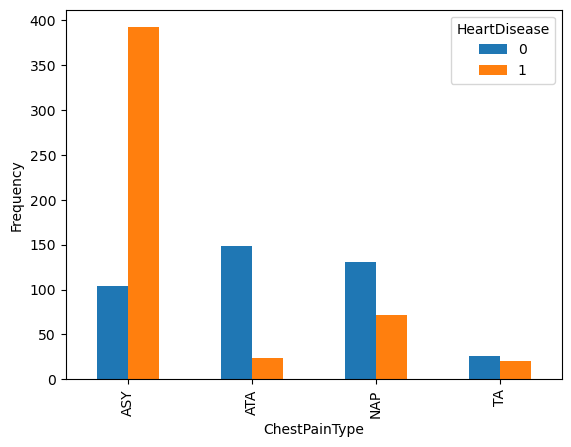

In [8]:
outcome_counts = df.groupby(['ChestPainType', 'HeartDisease']).size().unstack(fill_value=0)
outcome_counts.plot(kind='bar')
plt.ylabel('Frequency')

The data suggests a strong correlation between the 'asy' chest pain type and a higher likelihood of heart disease.

Text(0, 0.5, 'Frequency')

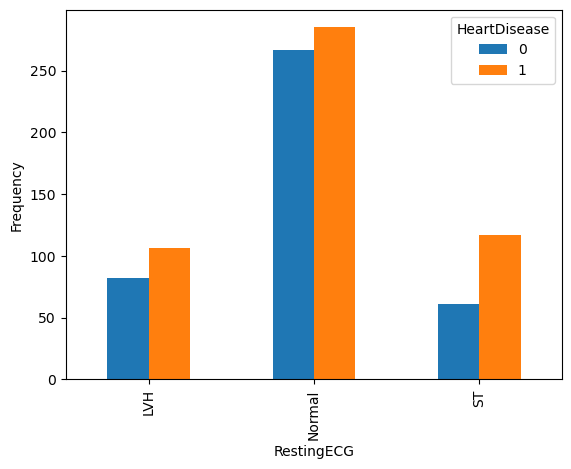

In [9]:
outcome_counts = df.groupby(['RestingECG', 'HeartDisease']).size().unstack(fill_value=0)
outcome_counts.plot(kind='bar')
plt.ylabel('Frequency')

66% of individuals presenting with an 'ST' RestingECG reading are found to have heart disease, indicating it may serve as a significant indicator of the condition.

Text(0, 0.5, 'Frequency')

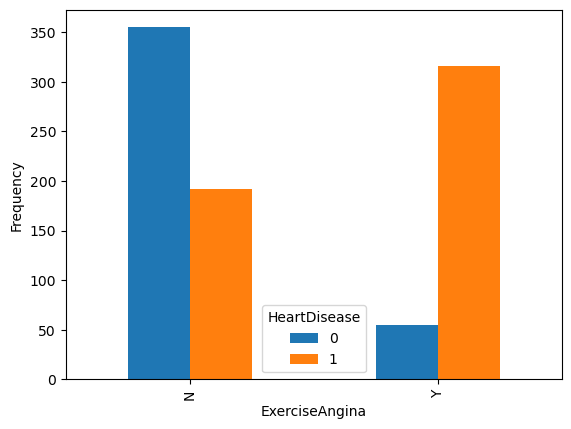

In [10]:
outcome_counts = df.groupby(['ExerciseAngina', 'HeartDisease']).size().unstack(fill_value=0)
outcome_counts.plot(kind='bar')
plt.ylabel('Frequency')

If exercise-induced angina is present, there is a high probability of heart disease.

Text(0, 0.5, 'Frequency')

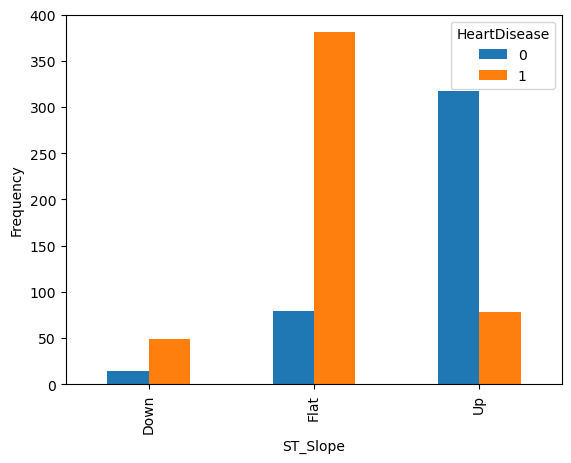

In [11]:
outcome_counts = df.groupby(['ST_Slope', 'HeartDisease']).size().unstack(fill_value=0)
outcome_counts.plot(kind='bar')
plt.ylabel('Frequency')

The graph suggests that a flat ST_Slope is strongly associated with an increased risk of heart disease.

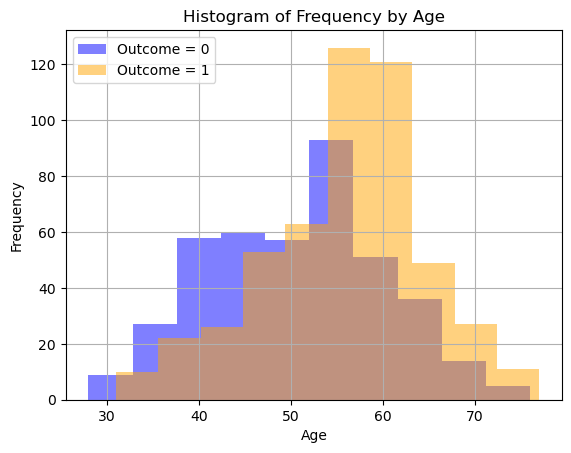

In [12]:
outcome_1_data = df[df['HeartDisease'] == 1]
outcome_0_data = df[df['HeartDisease'] == 0]

plt.hist(outcome_0_data['Age'], bins=10, alpha=0.5, color='blue', label='Outcome = 0')
plt.hist(outcome_1_data['Age'], bins=10, alpha=0.5, color='orange', label='Outcome = 1')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency by Age')
plt.legend()
plt.grid(True)
plt.show()

The data indicates that the prevalence of heart disease increases with age.

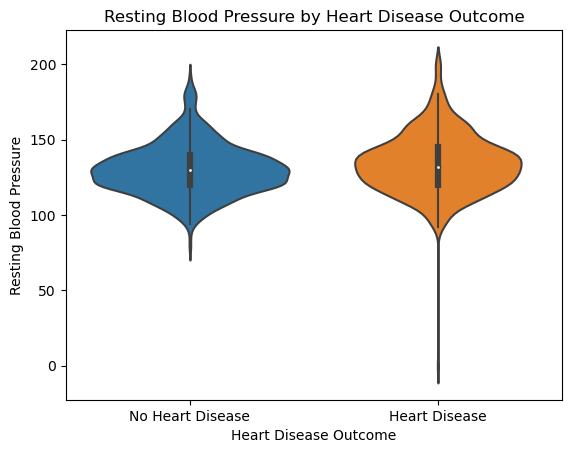

In [13]:
sns.violinplot(x='HeartDisease', y='RestingBP', data=df)
plt.title('Resting Blood Pressure by Heart Disease Outcome')
plt.xlabel('Heart Disease Outcome')
plt.ylabel('Resting Blood Pressure')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

We can't draw any strong conclusions from this plot.

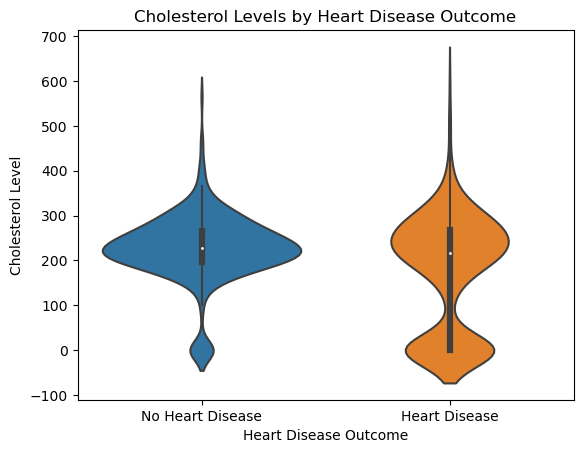

In [14]:
sns.violinplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Cholesterol Levels by Heart Disease Outcome')
plt.xlabel('Heart Disease Outcome')
plt.ylabel('Cholesterol Level')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

While there is considerable overlap and the medians are close, the data indicates a higher density of heart disease cases among individuals with cholesterol levels below 100 mg/dL.

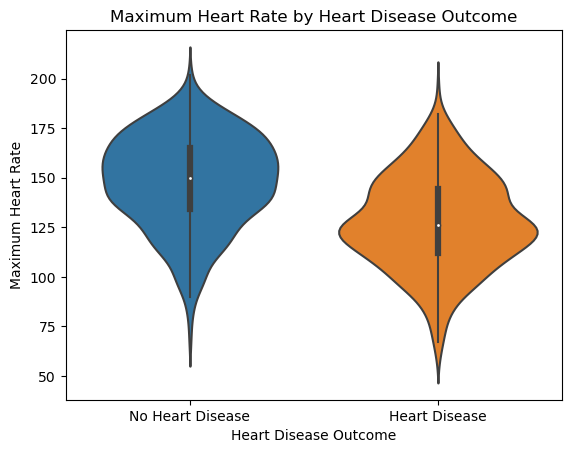

In [15]:
sns.violinplot(x='HeartDisease', y='MaxHR', data=df)
plt.title('Maximum Heart Rate by Heart Disease Outcome')
plt.xlabel('Heart Disease Outcome')
plt.ylabel('Maximum Heart Rate')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

For individuals with heart disease, the median resting blood pressure is around 120, whereas for those without heart disease, it's closer to 150. A lower maximum heart rate appears to be associated with a higher likelihood of heart disease.

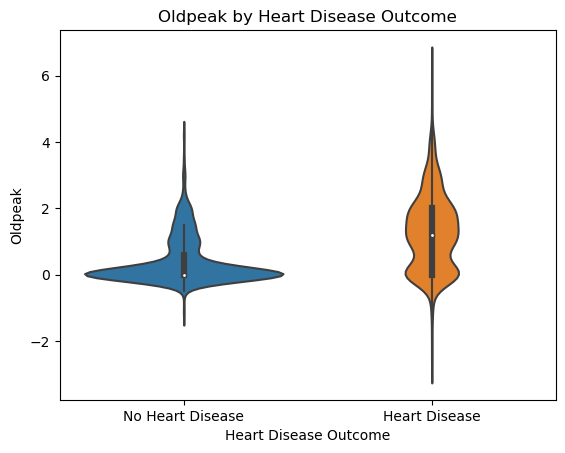

In [5]:
sns.violinplot(x='HeartDisease', y='Oldpeak', data=df)
plt.title('Oldpeak by Heart Disease Outcome')
plt.xlabel('Heart Disease Outa higher Oldpeak value might be associated with the presence of heart disease, although there is considerable individual variation.






come')
plt.ylabel('Oldpeak')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

A higher Oldpeak value might be associated with the presence of heart disease, although there is considerable individual variation.

Data Splitting

In [8]:
X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']
X=pd.get_dummies(X,dtype=float,drop_first=True)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

Logistic Regression

In [11]:
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Mansi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"The model's accuracy on the test set is: {accuracy * 100:.2f}%")


The model's accuracy on the test set is: 88.41%


Support vector machine

In [14]:
svc = SVC(kernel='linear', random_state = 2)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=2)

In [15]:
print(f"The model's accuracy on the test set is: {svc.score(X_test, Y_test)*100}%")

The model's accuracy on the test set is: 87.31884057971014%


Decision Tree

In [16]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [18]:
print(f"The model's accuracy on the test set is: {model.score(X_test, Y_test)*100}%")

The model's accuracy on the test set is: 76.81159420289855%


Naive Bayes

In [19]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [20]:
print(f"The model's accuracy on the test set is: {model.score(X_test, Y_test)*100}%")

The model's accuracy on the test set is: 87.68115942028986%


Logistic Regression provides the best accuracy of 88.41%.